In [0]:
import pandas as pd
import json
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
url="/content/gdrive/My Drive/YoutubeFRvideos.csv"
df1=pd.read_csv(url)
df1.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o..."
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...


In [0]:
#on crée un dictionnaire qui va assembler la catégorie avec l'id
import json
urljson="/content/gdrive/My Drive/YoutubeFR_category_id.json"

id_map_category={}
with open('/content/gdrive/My Drive/YoutubeFR_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
      id_map_category[category['id']]=category['snippet']['title']
id_map_category


{'1': 'Film & Animation',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '2': 'Autos & Vehicles',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [0]:
a=df1.category_id.values
liste=[]
for i in a:
  i=str(i)
  liste.append(id_map_category[i])
  

KeyError: ignored

In [0]:
df1[df1.category_id==29].shape

(114, 16)

In [0]:
id_map_category['29'] = 'not defined'


In [0]:
a=df1.category_id.values
liste=[]
for i in a:
  i=str(i)
  liste.append(id_map_category[i])
liste

['Entertainment',
 'Entertainment',
 'Comedy',
 'Gaming',
 'Sports',
 'Comedy',
 'Entertainment',
 'Entertainment',
 'Entertainment',
 'People & Blogs',
 'Entertainment',
 'Comedy',
 'Entertainment',
 'Education',
 'Comedy',
 'Comedy',
 'Howto & Style',
 'Entertainment',
 'Gaming',
 'Entertainment',
 'Science & Technology',
 'Entertainment',
 'Entertainment',
 'Entertainment',
 'Autos & Vehicles',
 'Howto & Style',
 'News & Politics',
 'Sports',
 'Comedy',
 'Film & Animation',
 'Entertainment',
 'Education',
 'Comedy',
 'Comedy',
 'Sports',
 'Comedy',
 'Entertainment',
 'Sports',
 'Music',
 'Sports',
 'Entertainment',
 'Education',
 'People & Blogs',
 'Sports',
 'Gaming',
 'Comedy',
 'People & Blogs',
 'People & Blogs',
 'Entertainment',
 'Education',
 'Entertainment',
 'Music',
 'Comedy',
 'Music',
 'News & Politics',
 'People & Blogs',
 'Sports',
 'Education',
 'Music',
 'Entertainment',
 'People & Blogs',
 'Entertainment',
 'Comedy',
 'People & Blogs',
 'Entertainment',
 'Comedy',
 

In [0]:
df1.columns.tolist()

['video_id',
 'trending_date',
 'title',
 'channel_title',
 'category_id',
 'publish_time',
 'tags',
 'views',
 'likes',
 'dislikes',
 'comment_count',
 'thumbnail_link',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'description',
 'category_title']

In [0]:
#j'implémente le df avec cette nouvelle colonnes 
df1['category_name']=liste
df1.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...,Entertainment
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...,Entertainment


In [0]:
#je ne garde que les colonnes interessantes pour le Kmeans
data=df1[['category_id', 'views', 'likes', 'dislikes', 'comment_count']]
data.head()

,category_id,views,likes,dislikes,comment_count
0,24,212702,29282,1108,3817
1,24,432721,14053,576,1161
2,23,482153,76203,477,9580
3,20,925222,85016,550,4303
4,17,141695,8091,72,481


In [0]:
#scaler les données

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
dataset_scaled  = sc_X.fit_transform(data)




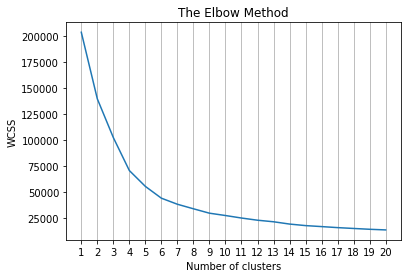

In [0]:
#Détermination du nombre de cluster avec la méthode elbow
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 21, 1.0))
plt.grid(which='major', axis='x')
plt.show()

In [0]:
data.head(10)

,category_id,views,likes,dislikes,comment_count,cluster
0,24,212702,29282,1108,3817,1
1,24,432721,14053,576,1161,1
2,23,482153,76203,477,9580,1
3,20,925222,85016,550,4303,1
4,17,141695,8091,72,481,1
5,23,141253,14354,202,417,1
6,24,187654,9286,1381,2419,1
7,24,91051,1674,1903,701,1
8,24,2340941,200598,6018,7575,1
9,22,635236,5945,722,1483,1


In [0]:
cluster_count=df1.cluster.value_counts().to_frame().reset_index()
cluster_count.columns=['cluster', 'nb_videos']

cluster_count

,cluster,nb_videos
0,1,33848
1,0,6668
2,3,199
3,2,9


In [0]:
#Quelle est la composition du cluster 2? 
df1[df1['cluster']==2][['channel_title','title','views','likes','dislikes','comment_count','category_name']]


,channel_title,title,views,likes,dislikes,comment_count,category_name
4598,YouTube Spotlight,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,24784870,1149222,483950,461979,Entertainment
4804,YouTube Spotlight,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,52611730,1891827,884962,702790,Entertainment
5040,YouTube Spotlight,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,75969469,2251828,1127813,827755,Entertainment
5342,YouTube Spotlight,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,100911567,2656682,1353661,682890,Entertainment
14200,Logan Paul Vlogs,Suicide: Be Here Tomorrow.,15808339,1625411,334551,561497,not defined
14494,Logan Paul Vlogs,Suicide: Be Here Tomorrow.,19092511,1782258,398361,611327,not defined
35431,ibighit,BTS (방탄소년단) 'FAKE LOVE' Official MV,39349927,3880074,72707,692311,Music
35626,ibighit,BTS (방탄소년단) 'FAKE LOVE' Official MV,62796390,4470923,119052,905925,Music
35902,ibighit,BTS (방탄소년단) 'FAKE LOVE' Official MV,65396157,4750254,141966,1040912,Music


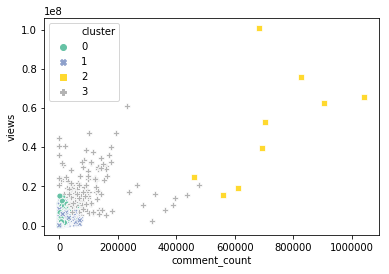

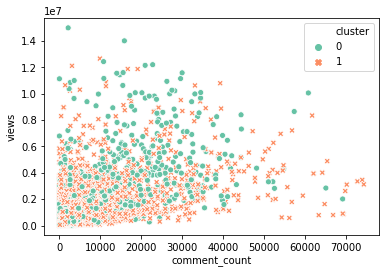

In [0]:
sns.scatterplot(x='comment_count', y='views',hue='cluster', style='cluster', data=df1, palette='Set2')
plt.show()

#zoom sur les clusters 0 et 1 qui sont tassés
sns.scatterplot(x='comment_count', y='views',hue='cluster', style='cluster', data=df1[df1['cluster']<=1], palette='Set2')
plt.show()

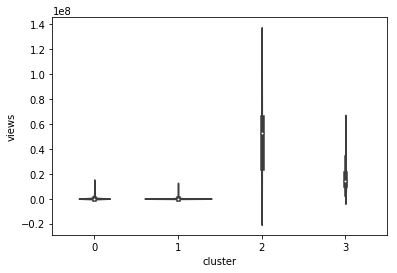

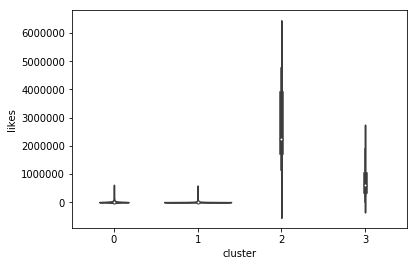

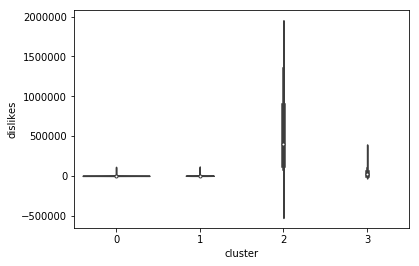

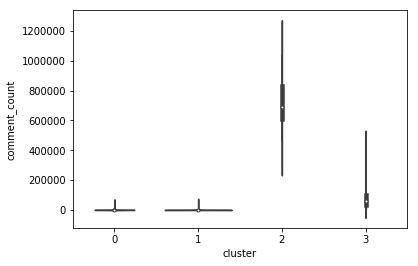

In [0]:
# dispersion des clusters selon chaque variable numérique


sns.violinplot(x='cluster', y='views', data=df1)
plt.show()

sns.violinplot(x='cluster', y='likes', data=df1)
plt.show()

sns.violinplot(x='cluster', y='dislikes', data=df1)
plt.show()

sns.violinplot(x='cluster', y='comment_count', data=df1)
plt.show()

In [0]:
df1[df1['cluster']==0].describe()

,category_id,views,likes,dislikes,comment_count,cluster
count,6668.000000,6.668000e+03,6668.000000,6668.000000,6668.000000,6668.0
mean,6.326635,5.604290e+05,25999.057738,945.008098,2201.406719,0.0
std,4.393851,1.318064e+06,61364.534869,3491.081156,5508.249382,0.0
min,1.000000,8.870000e+02,0.000000,0.000000,0.000000,0.0
25%,1.000000,2.571075e+04,618.750000,24.000000,79.000000,0.0
50%,10.000000,1.105890e+05,3683.000000,115.000000,348.000000,0.0
75%,10.000000,4.173610e+05,18947.500000,499.000000,1481.000000,0.0
max,17.000000,1.500565e+07,598252.000000,111144.000000,69286.000000,0.0


In [0]:
df1[df1['cluster']==1].describe()

,category_id,views,likes,dislikes,comment_count,cluster
count,33848.000000,3.384800e+04,33848.000000,33848.000000,33848.000000,33848.0
mean,22.882002,2.828309e+05,10498.448860,440.512970,1096.777860,1.0
std,3.040866,6.715470e+05,32003.397257,1805.395056,3637.315981,0.0
min,15.000000,2.230000e+02,0.000000,0.000000,0.000000,1.0
25%,22.000000,1.543475e+04,306.000000,17.000000,51.000000,1.0
50%,24.000000,6.620100e+04,1658.000000,77.000000,215.000000,1.0
75%,24.000000,2.466565e+05,6522.500000,304.000000,740.000000,1.0
max,44.000000,1.267273e+07,583780.000000,115658.000000,74458.000000,1.0


In [0]:
df1[df1['cluster']==2].describe()

,category_id,views,likes,dislikes,comment_count,cluster
count,9.000000,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.0
mean,20.444444,5.074677e+07,2.717609e+06,5.463359e+05,7.208207e+05,2.0
std,8.094923,2.859756e+07,1.322274e+06,4.671201e+05,1.785727e+05,0.0
min,10.000000,1.580834e+07,1.149222e+06,7.270700e+04,4.619790e+05,2.0
25%,10.000000,2.478487e+07,1.782258e+06,1.419660e+05,6.113270e+05,2.0
50%,24.000000,5.261173e+07,2.251828e+06,3.983610e+05,6.923110e+05,2.0
75%,24.000000,6.539616e+07,3.880074e+06,8.849620e+05,8.277550e+05,2.0
max,29.000000,1.009116e+08,4.750254e+06,1.353661e+06,1.040912e+06,2.0


In [0]:
df1[df1['cluster']==3].describe()

,category_id,views,likes,dislikes,comment_count,cluster
count,199.000000,1.990000e+02,1.990000e+02,199.000000,199.000000,199.0
mean,13.276382,1.675365e+07,7.787558e+05,35475.919598,82083.924623,3.0
std,6.424306,9.493424e+06,5.166411e+05,46365.747695,76953.637473,0.0
min,1.000000,2.497718e+06,0.000000e+00,0.000000,0.000000,3.0
25%,10.000000,1.068083e+07,4.029225e+05,10787.000000,35904.000000,3.0
50%,10.000000,1.419788e+07,6.237870e+05,19400.000000,58991.000000,3.0
75%,17.000000,2.070194e+07,1.001184e+06,48044.000000,100533.000000,3.0
max,29.000000,6.077651e+07,2.392595e+06,361763.000000,477215.000000,3.0


In [0]:
KPI_mean_cluster0=[df1[df1['cluster']==0]['views'].mean(),df1[df1['cluster']==0]['likes'].mean(),df1[df1['cluster']==0]['dislikes'].mean(),df1[df1['cluster']==0]['comment_count'].mean()]
KPI_mean_cluster1=[df1[df1['cluster']==1]['views'].mean(),df1[df1['cluster']==1]['likes'].mean(),df1[df1['cluster']==1]['dislikes'].mean(),df1[df1['cluster']==1]['comment_count'].mean()]
KPI_mean_cluster2=[df1[df1['cluster']==2]['views'].mean(),df1[df1['cluster']==2]['likes'].mean(),df1[df1['cluster']==2]['dislikes'].mean(),df1[df1['cluster']==2]['comment_count'].mean()]
KPI_mean_cluster3=[df1[df1['cluster']==3]['views'].mean(),df1[df1['cluster']==3]['likes'].mean(),df1[df1['cluster']==3]['dislikes'].mean(),df1[df1['cluster']==3]['comment_count'].mean()]

recap_mean=pd.DataFrame([KPI_mean_cluster0,KPI_mean_cluster1,KPI_mean_cluster2,KPI_mean_cluster3], columns=['views_mean','likes_mean','dislikes_mean','comment_count_mean'],index=['cluster0', 'cluster1', 'cluster2', 'cluster3'])
recap_mean

,views_mean,likes_mean,dislikes_mean,comment_count_mean
cluster0,5.604290e+05,2.599906e+04,945.008098,2201.406719
cluster1,2.828309e+05,1.049845e+04,440.512970,1096.777860
cluster2,5.074677e+07,2.717609e+06,546335.888889,720820.666667
cluster3,1.675365e+07,7.787558e+05,35475.919598,82083.924623


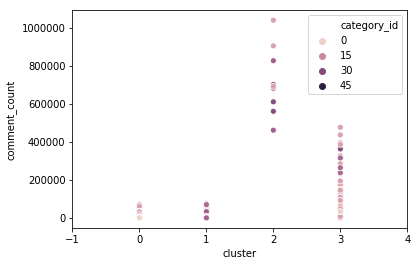

In [0]:
sns.scatterplot(x='cluster', y='comment_count', hue=df1.category_id, data=df1)
plt.xlim(-1,4,1)
plt.show()

In [0]:
# compter le nbre de videos par cluster et par category

df1_categ_group = df1.groupby(['cluster','category_name'])['video_id'].count().to_frame().reset_index()
df1_categ_group.columns = ['cluster','category_title', 'count']
df1_categ_group

,cluster,category_title,count
0,0,Autos & Vehicles,673
1,0,Film & Animation,2149
2,0,Music,3811
3,0,Pets & Animals,7
4,0,Sports,28
5,1,Comedy,4338
6,1,Education,769
7,1,Entertainment,9793
8,1,Gaming,1458
9,1,Howto & Style,2361


In [0]:

# calcul du nbre total de videos par cluster

tot=df1_categ_group.groupby(['cluster']).sum()['count'].reset_index()
tot.columns=['cluster','tot_count']
tot

,cluster,tot_count
0,0,6668
1,1,33848
2,2,9
3,3,199


In [0]:
# on rassemble le tout dans un seul dataframe

df1_categ_group = df1_categ_group.merge(right=tot, 
                                    how='inner',
                                    left_on='cluster',
                                    right_on='cluster')

df1_categ_group

,cluster,category_title,count,tot_count
0,0,Autos & Vehicles,673,6668
1,0,Film & Animation,2149,6668
2,0,Music,3811,6668
3,0,Pets & Animals,7,6668
4,0,Sports,28,6668
5,1,Comedy,4338,33848
6,1,Education,769,33848
7,1,Entertainment,9793,33848
8,1,Gaming,1458,33848
9,1,Howto & Style,2361,33848


In [0]:
# calcul de la répartition des category par cluster

df1_categ_group['pct'] = df1_categ_group['count'] / df1_categ_group['tot_count']*100
df1_categ_group

,cluster,category_title,count,tot_count,pct
0,0,Autos & Vehicles,673,6668,10.092981
1,0,Film & Animation,2149,6668,32.228554
2,0,Music,3811,6668,57.153569
3,0,Pets & Animals,7,6668,0.104979
4,0,Sports,28,6668,0.419916
5,1,Comedy,4338,33848,12.816119
6,1,Education,769,33848,2.271922
7,1,Entertainment,9793,33848,28.932286
8,1,Gaming,1458,33848,4.307492
9,1,Howto & Style,2361,33848,6.975301


In [0]:
cluster_0=df1_categ_group[df1_categ_group['cluster']==0].sort_values(by='pct', ascending=False)
cluster_0

,cluster,category_title,count,tot_count,pct
2,0,Music,3811,6668,57.153569
1,0,Film & Animation,2149,6668,32.228554
0,0,Autos & Vehicles,673,6668,10.092981
4,0,Sports,28,6668,0.419916
3,0,Pets & Animals,7,6668,0.104979


In [0]:
cluster_1=df1_categ_group[df1_categ_group['cluster']==1].sort_values(by='pct', ascending=False)
cluster_1

,cluster,category_title,count,tot_count,pct
7,1,Entertainment,9793,33848,28.932286
12,1,People & Blogs,5713,33848,16.878398
5,1,Comedy,4338,33848,12.816119
16,1,Sports,4298,33848,12.697944
11,1,News & Politics,3750,33848,11.078941
9,1,Howto & Style,2361,33848,6.975301
8,1,Gaming,1458,33848,4.307492
14,1,Science & Technology,796,33848,2.351690
6,1,Education,769,33848,2.271922
13,1,Pets & Animals,230,33848,0.679508


In [0]:
cluster_3=df1_categ_group[df1_categ_group['cluster']==3].sort_values(by='pct', ascending=False)
cluster_3

,cluster,category_title,count,tot_count,pct
27,3,Music,132,199,66.331658
24,3,Entertainment,22,199,11.055276
31,3,Sports,16,199,8.040201
25,3,Film & Animation,8,199,4.020101
29,3,People & Blogs,6,199,3.015075
30,3,Science & Technology,6,199,3.015075
23,3,Comedy,5,199,2.512563
28,3,News & Politics,2,199,1.005025
26,3,Gaming,1,199,0.502513
32,3,not defined,1,199,0.502513


In [0]:
df1[(df1['cluster']==3) & (df1['category_name']=='Music')][['channel_title','title','views','likes','dislikes','comment_count']].sort_values(by='views', ascending=False).head(15)


,channel_title,title,views,likes,dislikes,comment_count
33720,ChildishGambinoVEVO,Childish Gambino - This Is America (Official V...,60776509,2183745,104379,232723
33469,ChildishGambinoVEVO,Childish Gambino - This Is America (Official V...,47169016,1841553,79716,194822
1598,LuisFonsiVEVO,"Luis Fonsi, Demi Lovato - Échame La Culpa",47078714,1763400,78228,101453
21596,NickyJamTV,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,40567774,448371,16682,19908
1247,LuisFonsiVEVO,"Luis Fonsi, Demi Lovato - Échame La Culpa",38647842,1600405,68558,91409
11132,Bruno Mars,Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...,37728802,1629948,56305,116255
12373,TaylorSwiftVEVO,"Taylor Swift - End Game ft. Ed Sheeran, Future",34708457,1681449,91764,141243
174,Ed Sheeran,Ed Sheeran - Perfect (Official Music Video),33523622,1634134,21082,85067
38339,Cardi B,"Cardi B, Bad Bunny & J Balvin - I Like It [Off...",32523416,1219780,61458,76612
38732,Maroon5VEVO,Maroon 5 - Girls Like You ft. Cardi B,32513514,1780890,27830,109533


In [0]:
df1[(df1['cluster']==3) & (df1['category_name']=='Entertainment')][['channel_title','title','views','likes','dislikes','comment_count']].sort_values(by='views', ascending=False).head(15)

,channel_title,title,views,likes,dislikes,comment_count
24755,Marvel Entertainment,Marvel Studios' Avengers: Infinity War - Offic...,39980116,1420090,26137,177598
24517,Marvel Entertainment,Marvel Studios' Avengers: Infinity War - Offic...,36112519,1355014,22416,170801
24309,Marvel Entertainment,Marvel Studios' Avengers: Infinity War - Offic...,30180849,1242234,16902,158047
30994,FoxStarHindi,Sanju | Official Teaser | Ranbir Kapoor | Rajk...,28572753,646407,21140,40610
30668,Sony Pictures Entertainment,VENOM - Official Trailer (HD),27973210,850373,26543,96767
37913,FoxStarHindi,Sanju | Official Trailer | Ranbir Kapoor | Raj...,21739537,549875,16991,41068
35212,Eurovision Song Contest,Netta - Toy - Israel - LIVE - Grand Final - Eu...,20929664,184529,361763,91466
24111,Marvel Entertainment,Marvel Studios' Avengers: Infinity War - Offic...,19716689,975752,9120,127045
34897,Eurovision Song Contest,Netta - Toy - Israel - LIVE - Grand Final - Eu...,19424289,169615,333250,83394
30691,FoxStarHindi,Sanju | Official Teaser | Ranbir Kapoor | Rajk...,18639195,511778,15607,32435
